In [1]:
from simulation import *
from aesthetics import *
from scipy import stats

%matplotlib inline
%load_ext autoreload
%autoreload 2

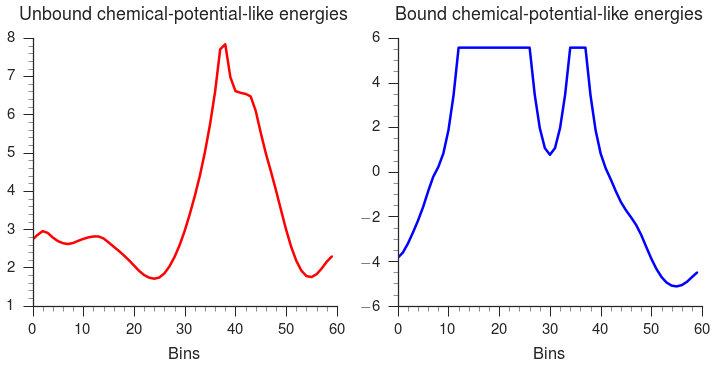

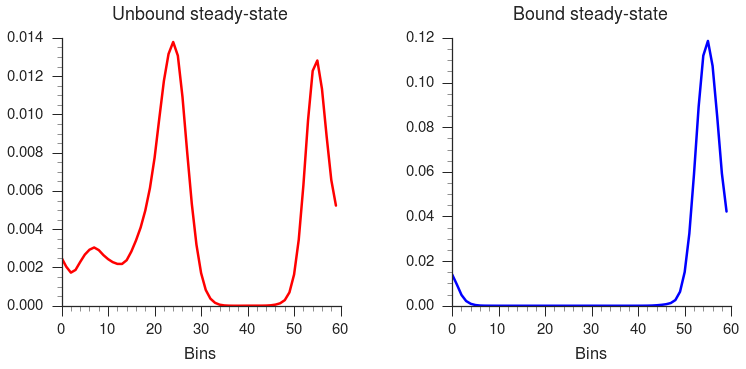

C_intrasurface = 	8.33e+13 second**-1
D = 			3.00e+15 degrees**2 second**-1
C_intersurface = 	2.40e+05 mol**-1 second**-1
Catalytic rate = 	140 second**-1
ATP concentration = 	0.002 M
Time step = 		1.00e-15 second
Intrasurface flux = 	33.58 +/- 0.06 cycles second**-1


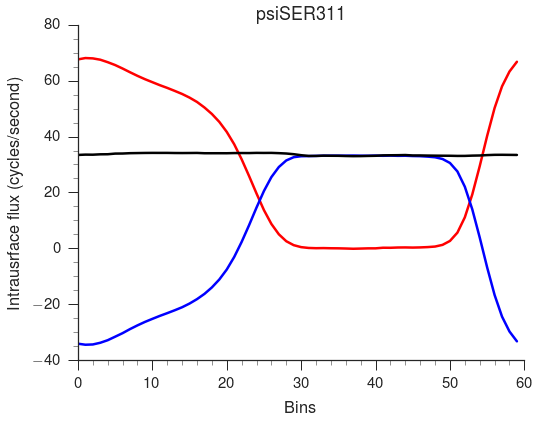

[[ 0.80411278  0.07532416  0.         ...,  0.          0.          0.        ]
 [ 0.09219411  0.83109365  0.07671224 ...,  0.          0.          0.        ]
 [ 0.          0.0905259   0.82278972 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.83628174  0.06977256  0.        ]
 [ 0.          0.          0.         ...,  0.09952974  0.83014814
   0.07032212]
 [ 0.          0.          0.         ...,  0.          0.09875192
   0.85326943]]


In [105]:
this = simulation()
this.name = 'psiSER311'
this.simulate(plot=True)
print(this.tm)

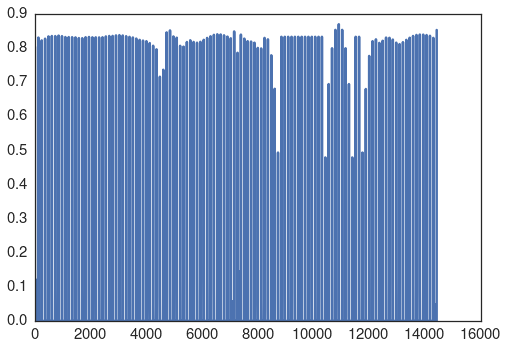

In [111]:
plt.plot(this.tm.flatten())

# Increase the number of bins without changing the underlying energy surfaces

In [72]:
a = sc.interpolate.interp1d(range(this.bins), this.unbound)

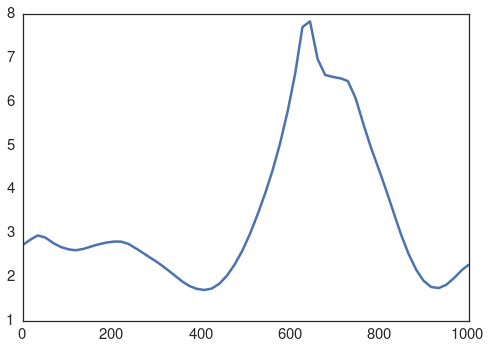

In [73]:
expanse = 1000
plt.plot(range(expanse), [a((this.bins -1) * i/1000) for i in range(expanse)])

# Define the barrier

In [74]:
maximum = 20 # kcal/mol
spread = 40

In [75]:
def add_barrier(surface, maximum, spread, location):
    energy = np.copy(surface)
    barrier_slope = maximum / (spread/2)
    barrier = np.zeros((spread))   
    barrier[0:spread/2] = barrier_slope * np.arange(int(spread/2))   
    barrier[spread/2:spread] = barrier[0:spread/2][::-1]

    locations = np.arange(location - spread/2, location + spread/2)
    for index in locations:
        energy[index] += barrier[np.where(locations == index)[0]]
    return energy

/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


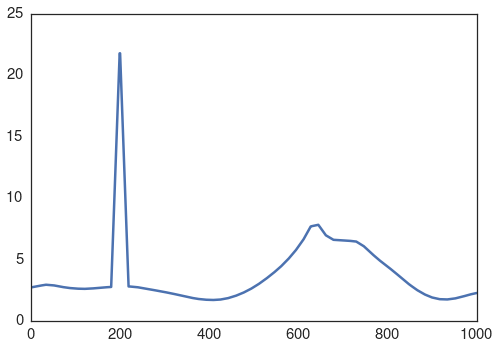

In [81]:
tmp = add_barrier([a((this.bins -1) * i/1000) for i in range(expanse)], maximum, spread, 200)
plt.plot(tmp)

# Add the barrier to psiSER311

/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:6: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/home/dslochower/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


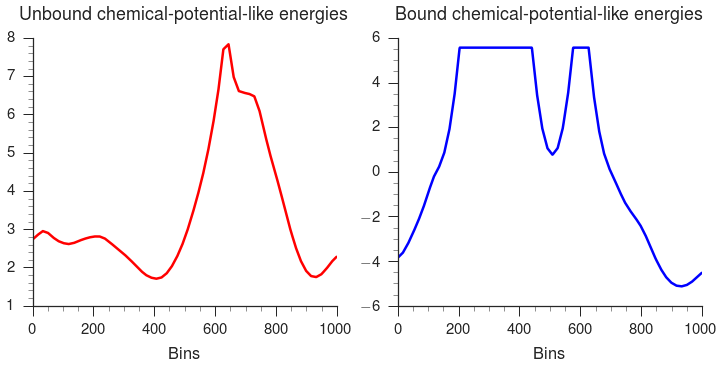

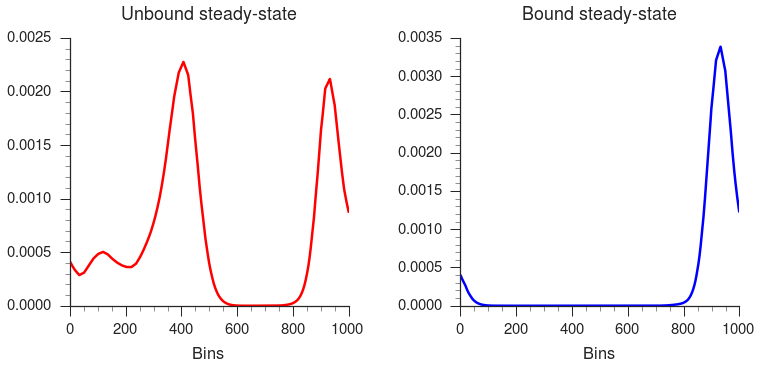

C_intrasurface = 	2.31e+16 second**-1
D = 			3.00e+15 degrees**2 second**-1
C_intersurface = 	2.40e+05 mol**-1 second**-1
Catalytic rate = 	140 second**-1
ATP concentration = 	0.002 M
Time step = 		1.00e-17 second
Intrasurface flux = 	45.66 +/- 1.95 cycles second**-1


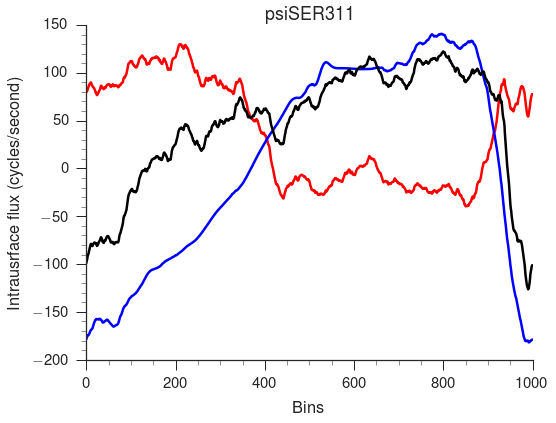

[[ 0.43273857  0.23010554  0.         ...,  0.          0.          0.        ]
 [ 0.23286565  0.53702881  0.23010554 ...,  0.          0.          0.        ]
 [ 0.          0.23286565  0.53702881 ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.          0.         ...,  0.53701381  0.22917454  0.        ]
 [ 0.          0.          0.         ...,  0.23381164  0.53701381
   0.22917454]
 [ 0.          0.          0.         ...,  0.          0.23381164
   0.63424253]]


In [112]:
# This will grab the 'unmodified' energies
this = simulation()
this.name = 'psiSER311'
this.simulate(plot=False)

# Reshape the 'unmodified' energies
expanse = 1000
u = sc.interpolate.interp1d(range(this.bins), this.unbound)
unbound = [u((this.bins -1) * i/1000) for i in range(expanse)]
b = sc.interpolate.interp1d(range(this.bins), this.bound)
bound = [b((this.bins -1) * i/1000) for i in range(expanse)]

# Add the barrier
maximum = 0 # kcal/mol
spread = 40 # bins
unbound_blocked = add_barrier(unbound, maximum, spread, 200)
bound_blocked   = add_barrier(bound, maximum, spread, 200)

this = simulation()
this.name = 'psiSER311'
this.unbound = unbound_blocked
this.bound = bound_blocked
this.simulate(user_energies=True, plot=True)
print(this.tm)

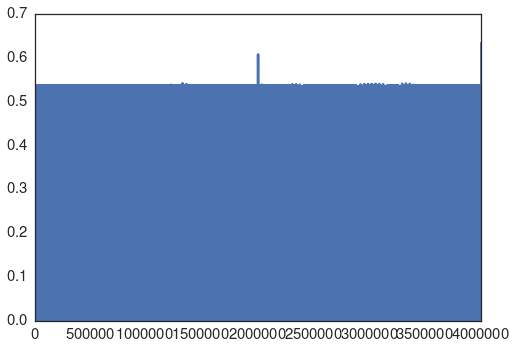

In [113]:
plt.plot(this.tm.flatten())

# Why is the flux so bad when the steady state probability looks good?

In [100]:
this.tm[this.tm != 0]

array([ 0.43273857,  0.23010554,  0.33715589, ...,  0.13194583,
        0.23381164,  0.63424253])

# Scan barrier position

In [ ]:
name = 'psiSER311'
fig = plt.figure(figsize=(8,6), dpi=300)
ax = fig.add_subplot(111)
for scaling in np.arange(4, 12, 0.2):
    this = simulation()
    this.name = name
    this.simulate()
    ax.errorbar(this.C_intersurface, np.mean(this.flux_u + this.flux_b), sc.stats.sem(this.flux_u + this.flux_b), 
                fmt='o', c='b')
    del this
    
ax.set_xlabel('Barrier position')
ax.set_ylabel('Flux (cycles/second)')
ax.set_title(name)
ax.set_xscale('log')
pretty_plot(fig)